<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Multi-quantile loss with CatBoost



# Imports
<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
sns.set()

In [2]:
import catboost
catboost.__version__

'1.1.1'

# Classification vs. regression
<hr style="border:2px solid black"> </hr>


- While many classification models, particularly calibrated models, come with uncertainty quantification by predicting a probability distribution over target classes, quantifying uncertainty in regression tasks is much more nuanced.



# Multi-quantile loss function 
<hr style="border:2px solid black"> </hr>


- **Classical quantile regression**: the main disadvantage of quantile regression was that one model had to be trained per predicted quantile. For instance, in order to predict the 10th, 50th, and 90th quantiles of a target distribution, three independent models would need to be trained. 
- Catboost has since addressed this issue with the **multi-quantile loss function** — a loss function that enables a single model to predict an arbitrary number of quantiles. Catboost now extends this idea by allowing the base decision trees to output multiple quantiles per node. This allows a single model to predict multiple quantiles by minimizing a new single loss function.
    


# Simple Linear Regression
<hr style="border:2px solid black"> </hr>

In [3]:

# Number of training and testing examples
n = 1000

# Generate random x values between 0 and 1
x_train = np.random.rand(n)
x_test = np.random.rand(n)

# Generate random noise for the target
noise_train = np.random.normal(0, 0.3, n)
noise_test = np.random.normal(0, 0.3, n)

# Set the slope and y-intercept of the line
a, b = 2, 3

# Generate y values according to the equation y = ax + b + noise
y_train = a * x_train + b + noise_train
y_test = a * x_test + b + noise_test

In [6]:
# Store quantiles 0.01 through 0.99 in a list
quantiles = [q/100 for q in range(1, 100)]

# Format the quantiles as a string for Catboost
quantile_str = str(quantiles).replace('[','').replace(']','')

# Fit the multi quantile model
model = CatBoostRegressor(iterations=100,
                          loss_function=f'MultiQuantile:alpha={quantile_str}')

model.fit(x_train.reshape(-1,1), y_train)

0:	learn: 0.1810842	total: 13.5ms	remaining: 1.33s
1:	learn: 0.1770253	total: 34.4ms	remaining: 1.69s
2:	learn: 0.1730431	total: 54.5ms	remaining: 1.76s
3:	learn: 0.1691594	total: 73.7ms	remaining: 1.77s
4:	learn: 0.1654504	total: 91.7ms	remaining: 1.74s
5:	learn: 0.1619833	total: 110ms	remaining: 1.73s
6:	learn: 0.1585813	total: 129ms	remaining: 1.71s
7:	learn: 0.1552861	total: 147ms	remaining: 1.69s
8:	learn: 0.1520850	total: 165ms	remaining: 1.67s
9:	learn: 0.1490419	total: 184ms	remaining: 1.65s
10:	learn: 0.1461082	total: 202ms	remaining: 1.64s
11:	learn: 0.1433382	total: 221ms	remaining: 1.62s
12:	learn: 0.1406828	total: 240ms	remaining: 1.61s
13:	learn: 0.1380750	total: 261ms	remaining: 1.6s
14:	learn: 0.1355394	total: 280ms	remaining: 1.59s
15:	learn: 0.1331916	total: 299ms	remaining: 1.57s
16:	learn: 0.1309219	total: 318ms	remaining: 1.55s
17:	learn: 0.1287286	total: 336ms	remaining: 1.53s
18:	learn: 0.1266635	total: 354ms	remaining: 1.51s
19:	learn: 0.1245858	total: 373ms	rem

In [7]:
# Make predictions on the test set
preds = model.predict(x_test.reshape(-1, 1))
preds = pd.DataFrame(preds, columns=[f'pred_{q}' for q in quantiles])

In [9]:
preds

,pred_0.01,pred_0.02,pred_0.03,pred_0.04,pred_0.05,pred_0.06,pred_0.07,pred_0.08,pred_0.09,pred_0.1,...,pred_0.9,pred_0.91,pred_0.92,pred_0.93,pred_0.94,pred_0.95,pred_0.96,pred_0.97,pred_0.98,pred_0.99
0,3.484349,3.581225,3.612218,3.657550,3.707939,3.740295,3.757868,3.779672,3.807884,3.828785,...,4.650586,4.680860,4.703581,4.749773,4.802218,4.834870,4.877710,4.911816,4.944763,5.023177
1,4.094757,4.117323,4.148307,4.213493,4.261332,4.315170,4.342780,4.400535,4.426156,4.442776,...,5.177179,5.191943,5.207701,5.248551,5.281929,5.312704,5.339943,5.375514,5.410160,5.489163
2,3.036222,3.102161,3.159968,3.196806,3.210615,3.224268,3.243951,3.261405,3.278659,3.292482,...,4.082887,4.095615,4.110635,4.125743,4.143195,4.177254,4.214154,4.255194,4.286707,4.346988
3,3.491753,3.586055,3.606172,3.619562,3.632013,3.657156,3.677408,3.693587,3.711716,3.728403,...,4.559761,4.595307,4.618921,4.673336,4.719630,4.774770,4.802454,4.825196,4.852470,4.921912
4,3.638627,3.679085,3.701142,3.733046,3.779476,3.813797,3.844728,3.856212,3.869817,3.890357,...,4.761166,4.781832,4.802524,4.829247,4.869497,4.890136,4.919881,4.967651,4.996114,5.070092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.023883,4.100093,4.150970,4.217260,4.233697,4.242331,4.252157,4.273557,4.292596,4.303269,...,5.048672,5.067402,5.087733,5.097104,5.119905,5.152478,5.178815,5.206532,5.233429,5.285694
996,2.934652,2.976107,3.018946,3.047222,3.069711,3.086254,3.099627,3.117910,3.136610,3.148727,...,3.984209,3.999207,4.019589,4.049526,4.072509,4.111146,4.160469,4.208714,4.248996,4.317756
997,3.157946,3.247416,3.299525,3.327901,3.351302,3.379221,3.399242,3.419269,3.435760,3.455624,...,4.249717,4.267057,4.277198,4.293322,4.320047,4.367582,4.424409,4.447142,4.487299,4.597367
998,2.934652,2.976107,3.018946,3.047222,3.069711,3.086254,3.099627,3.117910,3.136610,3.148727,...,3.984209,3.999207,4.019589,4.049526,4.072509,4.111146,4.160469,4.208714,4.248996,4.317756


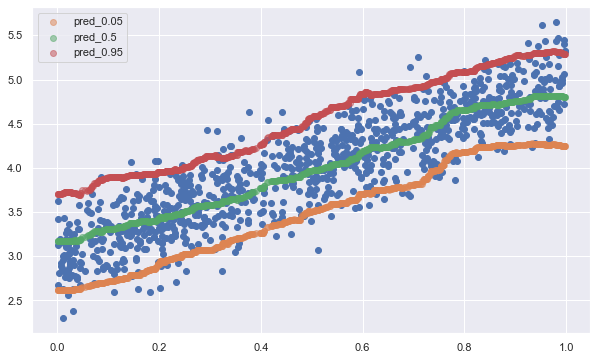

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_test, y_test)

for col in ['pred_0.05', 'pred_0.5', 'pred_0.95']:
    ax.scatter(x_test.reshape(-1,1), preds[col], alpha=0.50, label=col)

ax.legend()

# Coverage
<hr style="border:2px solid black"> </hr>

    
- When working with predicted quantiles, one **metric** we’re often interested in analyzing is coverage.
- **Coverage** is the percentage of targets that fall between two desired quantiles. As an example, coverage can be computed using the 5th and 95th quantiles as follows:
- Using the 5th and 95th quantiles, **assuming perfect calibration**, we would expect to have a coverage of 95–5 = 90%. In this example, the predicted quantiles were slightly off but still close, giving a coverage value of 91.4%.
    


In [10]:
coverage_90 = np.mean((y_test <= preds['pred_0.95']) & (
    y_test >= preds['pred_0.05']))*100
print(coverage_90)

91.10000000000001


# Non-Linear Regression with Variable Noise
<hr style="border:2px solid black"> </hr>

In [11]:
# Create regions of the domain that have variable noise
bounds = [(-10, -8), (-5, -4), (-4, -3), (-3, -1),
          (-1, 1), (1, 3), (3, 4), (4, 5), (8, 10)]
scales = [18, 15, 8, 11, 1, 2, 9, 16, 19]

x_train = np.array([])
x_test = np.array([])
y_train = np.array([])
y_test = np.array([])

for b, scale in zip(bounds, scales):

    # Randomly select the number of samples in each region
    n = np.random.randint(low=100, high=200)

    # Generate values of the domain between b[0] and b[1]
    x_curr = np.linspace(b[0], b[1], n)

    # For even scales, noise comes from an exponential distribution
    if scale % 2 == 0:

        noise_train = np.random.exponential(scale=scale, size=n)
        noise_test = np.random.exponential(scale=scale, size=n)

    # For odd scales, noise comes from a normal distribution
    else:

        noise_train = np.random.normal(scale=scale, size=n)
        noise_test = np.random.normal(scale=scale, size=n)

    # Create training and testing sets
    y_curr_train = x_curr**2 + noise_train
    y_curr_test = x_curr**2 + noise_test

    x_train = np.concatenate([x_train, x_curr])
    x_test = np.concatenate([x_test, x_curr])
    y_train = np.concatenate([y_train, y_curr_train])
    y_test = np.concatenate([y_test, y_curr_test])

In [13]:
model = CatBoostRegressor(iterations=300,
                          loss_function=f'MultiQuantile:alpha={quantile_str}')

model.fit(x_train.reshape(-1, 1), y_train)

preds = model.predict(x_test.reshape(-1, 1))
preds = pd.DataFrame(preds, columns=[f'pred_{q}' for q in quantiles])

0:	learn: 9.1396884	total: 23.3ms	remaining: 6.97s
1:	learn: 8.9340573	total: 45.3ms	remaining: 6.75s
2:	learn: 8.7321227	total: 57.9ms	remaining: 5.73s
3:	learn: 8.5266947	total: 78.1ms	remaining: 5.78s
4:	learn: 8.3374824	total: 97.2ms	remaining: 5.74s
5:	learn: 8.1456060	total: 116ms	remaining: 5.69s
6:	learn: 7.9726078	total: 136ms	remaining: 5.7s
7:	learn: 7.8004474	total: 156ms	remaining: 5.68s
8:	learn: 7.6273872	total: 175ms	remaining: 5.66s
9:	learn: 7.4642305	total: 194ms	remaining: 5.64s
10:	learn: 7.3097930	total: 214ms	remaining: 5.62s
11:	learn: 7.1572844	total: 234ms	remaining: 5.62s
12:	learn: 7.0127828	total: 254ms	remaining: 5.61s
13:	learn: 6.8730612	total: 274ms	remaining: 5.61s
14:	learn: 6.7347831	total: 294ms	remaining: 5.59s
15:	learn: 6.6060161	total: 314ms	remaining: 5.58s
16:	learn: 6.4940266	total: 334ms	remaining: 5.55s
17:	learn: 6.3758911	total: 353ms	remaining: 5.53s
18:	learn: 6.2572879	total: 372ms	remaining: 5.51s
19:	learn: 6.1391890	total: 392ms	rem

162:	learn: 3.2639827	total: 3.17s	remaining: 2.66s
163:	learn: 3.2637779	total: 3.17s	remaining: 2.63s
164:	learn: 3.2627051	total: 3.19s	remaining: 2.61s
165:	learn: 3.2616670	total: 3.21s	remaining: 2.59s
166:	learn: 3.2605432	total: 3.23s	remaining: 2.57s
167:	learn: 3.2600017	total: 3.25s	remaining: 2.56s
168:	learn: 3.2590521	total: 3.27s	remaining: 2.54s
169:	learn: 3.2583831	total: 3.29s	remaining: 2.52s
170:	learn: 3.2575514	total: 3.31s	remaining: 2.5s
171:	learn: 3.2571557	total: 3.33s	remaining: 2.48s
172:	learn: 3.2566968	total: 3.35s	remaining: 2.46s
173:	learn: 3.2563837	total: 3.37s	remaining: 2.44s
174:	learn: 3.2555712	total: 3.39s	remaining: 2.42s
175:	learn: 3.2549745	total: 3.4s	remaining: 2.4s
176:	learn: 3.2544036	total: 3.42s	remaining: 2.38s
177:	learn: 3.2531536	total: 3.44s	remaining: 2.36s
178:	learn: 3.2513871	total: 3.46s	remaining: 2.34s
179:	learn: 3.2498878	total: 3.48s	remaining: 2.32s
180:	learn: 3.2494343	total: 3.5s	remaining: 2.3s
181:	learn: 3.248

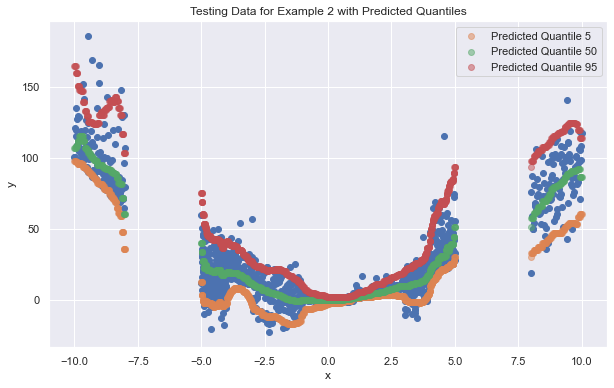

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_test, y_test)

for col in ['pred_0.05', 'pred_0.5', 'pred_0.95']:

    quantile = int(float(col.split('_')[-1])*100)
    label_name = f'Predicted Quantile {quantile}'
    ax.scatter(x_test.reshape(-1, 1), preds[col], alpha=0.50, label=label_name)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Testing Data for Example 2 with Predicted Quantiles')
ax.legend()

    
- Upon visual inspection, the model has characterized this non-linear, heteroscedastic relationship well. Notice how, near x = 0, the three predicted quantiles converge towards a single value.
- This is because the region near x = 0 has almost no noise — any model that correctly predicts the conditional probability distribution in this region should predict a small variance. Conversely, when x is between 7.5 and 10.0, the predicted quantiles are much further apart because of the inherent noise in the region. 90% coverage can be computed as before:
    


In [15]:
coverage_90 = np.mean((y_test <= preds['pred_0.95']) & (
    y_test >= preds['pred_0.05']))*100
print(coverage_90)

89.66876971608832


# Conclusions
<hr style="border:2px solid black"> </hr>

    
- It’s important to note that quantile regression makes no statistical or algorithmic guarantees of convergence, and the performance of these models will vary depending on the nature of the learning problem. 



# References
<hr style="border:2px solid black"> </hr>


- https://towardsdatascience.com/a-new-way-to-predict-probability-distributions-e7258349f464
- https://catboost.ai/en/docs/concepts/loss-functions-regression#MultiQuantile
- https://brendanhasz.github.io/2018/12/15/quantile-regression.html
    


# Requirements
<hr style="border:2px solid black"> </hr>

In [7]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

matplotlib: 3.5.1
autopep8  : 1.6.0
numpy     : 1.21.6
seaborn   : 0.11.2
json      : 2.0.9
catboost  : 1.0.4
pandas    : 1.5.3

